In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

c:\Users\dakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
driver = webdriver.Chrome()
driver.get('https://internshala.com/internships/engineering-internship/index=0/')

html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
# web = requests.get('https://internshala.com/internships/engineering-internship/index=0/').text
# soup = BeautifulSoup(web, 'lxml')
print(soup.prettify())

<html class="js-focus-visible" lang="en" style="--scrollbar-width:17px;" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0 user-scalable=0" name="viewport"/>
  <meta content="702141670710132" property="fb:app_id"/>
  <meta content="website" property="og:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="@Internshala" name="twitter:site"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@internshala" name="twitter:creator"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-navbutton-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" crossorigin="" href="/static/fonts/Inter.woff2?v=3.11" rel="preload" type=

In [3]:
logo = []
for i in soup.find_all('div', class_='internship_logo'):
    try:
        logo.append("https://internshala.com"+i.img['src'])
    except:
        logo.append("no-logo.png")

print(len(logo))
logo[0:10]



40


['no-logo.png',
 'https://internshala.com/cached_uploads/logo%2F5e2034cb713da1579168971.png',
 'no-logo.png',
 'no-logo.png',
 'https://internshala.com/cached_uploads/logo%2F5e2fdd55c1be61580195157.jpg',
 'no-logo.png',
 'https://internshala.com/cached_uploads/logo%2F5e665386069051583764358.jpg',
 'https://internshala.com/cached_uploads/logo%2F63f9b32536ec71677308709.png',
 'https://internshala.com/cached_uploads/logo%2F63c2ca65b864f1673710181.jpg',
 'https://internshala.com/cached_uploads/logo%2F63fa32a50f6cd1677341349.jpg']

In [4]:
company_name=[]
for i in soup.find_all('a', class_='link_display_like_text view_detail_button'):
    company_name.append(i.text.strip())

print(len(company_name))
company_name

40


['Skill-Lync',
 'Bagzone Lifestyles Private Limited',
 'PNB MetLife India Life Insurance Company Limited',
 'HDFC Ergo General Insurance Company Limited',
 'Viacom India LLP',
 'Material Intelligence Lab',
 'HiFives',
 'United Global Engineering Solutions Pvt Ltd',
 'Dashamlav AI Labs',
 'Inside Infotech Soltution',
 'An2cabs',
 'RA Global Tech Solutions LLP',
 'Gazetinc Technology LLP',
 'KidZoo',
 'Pradhan',
 'OlaGate',
 'Nimit Gupta',
 'Nelco Limited (Tata Group)',
 'CraftzShop',
 'Elanee Technologies',
 'One World Nation',
 'Gwala Organics',
 'KRIYANITI Consultancy Services Private Limited',
 'Adeep My IT Solution Private Limited',
 'Computer Age Group Of Companies',
 'Loadzpro',
 'Letsryl',
 'Nudron IoT Solutions LLP',
 'Trium Info Solutions Private Limited',
 'Bitsphere Infosystem Private Limited',
 'RezoVR',
 'Kanchan Sales',
 'Agriculture Risk Consultant Private Limited',
 'Zobyt',
 'Aman Jain',
 'Prakash Choudhary And Associates',
 'Digital Marketing Lane',
 'Hubnex Media Inc.

In [ ]:
# logo=[]
# for i in soup.find_all('img', class_='company_logo'):

In [6]:
job_title=[]
for i in soup.find_all('h3', class_='heading_4_5 profile'):
    job_title.append(i.text.strip())

# len(job_title)
job_title

l = []
location = []
for p in soup.find_all('p', id="location_names"):
    for i in p.find('a', class_="location_link view_detail_button"):
        l.append(i.text.strip())
    location.append(l)
    l = []
for div in soup.find_all('div', id="location_names"):
    for i in div.find('a', class_="location_link view_detail_button"):
        l.append(i.text.strip())
    location.append(l)
    l = []
print(len(job_title))
print(len(location))

40
40


In [7]:
import re

skills_reqd=[]
about_company=[]
job_responsibilities=[]
job_requirements=[]
l2=[]
l1=[]
for div in soup.find_all('div', class_="cta_container"):
    url = "https://internshala.com/"+div.find('a')['href']
    web2 = requests.get(url).text
    # print(url)
    #-------------------------------------------------------------------------------------
    soup2 = BeautifulSoup(web2, 'lxml')
    if(soup2.find('div', class_='section_heading heading_5_5 skills_heading')):
        for i in soup2.find_all('div', class_='round_tabs_container'):
                skills_reqd.append(i.text.strip().replace('\n', ', ').replace('\r', '')+" ")
                break
    else:
        skills_reqd.append(" ")
    for i in soup2.find_all('div', class_='text-container about_company_text_container'):
        about_company.append(i.text.strip())
    #-------------------------------------------------------------------------------------
    for div2 in soup2.find_all('div', class_='internship_details'):
            # count+=1
        for i in div2.select("div[class='text-container']"):
            txt = i.text.strip()
            # print(txt)
            if("Key responsibilities:" in txt):
                # print("yay")
                responsibilities = txt.split("Key responsibilities:")[1].split("Requirements:")[0].strip()
                
                #remove index numbers from responsibilities
                responsibilities = re.sub(r'\d+\.', '', responsibilities)
                responsibilities = responsibilities.replace("\n", ',')
                
                
                l1.append(responsibilities)
                # print(l1)
            # if "Key responsibilities:\n" in txt:
            #     print("yay")
                # print("----")

            if ("Requirements:" in txt):
                requirements = txt.split("Requirements:")[1].strip()
                requirements = re.sub(r'\d+\.', '', requirements)
                requirements = requirements.replace("\n", ',')
                
                l2.append(requirements)
                # print(l2)
        
        job_responsibilities.append(l1)
        job_requirements.append(l2)
        
        
    

        
# print(count)
print(len(skills_reqd))
print(len(about_company))
print(len(job_responsibilities))
print(len(job_requirements))
# print(skills_reqd)

40
40
40
40


In [11]:
location
#convert list of lists to list of strings
location = [''.join(map(str, l)) for l in location]
location

['Hyderabad',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Gurgaon',
 'Vadodara',
 'Work From Home',
 'Hyderabad',
 'Work From Home',
 'Surat',
 'Bangalore',
 'Mumbai',
 'Gurgaon',
 'Work From Home',
 'Mumbai',
 'Work From Home',
 'Work From Home',
 'Mumbai',
 'Work From Home',
 'Navsari',
 'Work From Home',
 'Work From Home',
 'Ranchi',
 'Agra',
 'Howrah',
 'Work From Home',
 'Work From Home',
 'Mumbai',
 'Mumbai',
 'Work From Home',
 'Work From Home',
 'Mumbai',
 'Thane',
 'Work From Home',
 'Work From Home',
 'Gurgaon',
 'Work From Home',
 'Work From Home',
 'Work From Home',
 'Pune']

In [19]:
#convert list of list to list of strings
job_responsibilities = [''.join(map(str, l)) for l in job_responsibilities]
# job_responsibilities
job_requirements = [''.join(map(str, l)) for l in job_requirements]
# job_requirements

[" Need a good base/understanding of Firebase and Cloud Firestore, Software engineering degree is strongly preferred Strong understanding of web design principles, HTML/CSS, and JavaScript, as well as experience working with the Webflow platform, Should be able to work independently as well as part of a team, Possess strong problem-solving and communication skills Fresher/experienced web application developers, Must be passionate about his/her work, Must know JavaScript basics Knowledge of PHP and SQL, Preferred prior knowledge of working with Javascript, HTML, and CSS, Codigniter or Laravel skills,,Additional information: ,, A developer intern from Delhi-NCR is preferred, Work type: Hybrid, Timing: Flexible, Commercials: Stipend provided (we're on early revenue and believe in wealth creation), Equity/ESOP: available for team players,,Note: We are looking for an enthusiastic developer(s) intern, who believes in solving real-life problems with tech. If you're looking to join a startup f

In [20]:
df = pd.DataFrame({'Company Name':company_name, 'Job Title':job_title, 'About Company':about_company, 'Location':location, 'Skills Required':skills_reqd, 'Job responsibilities':job_responsibilities, 'Job requirements':job_requirements, 'Job responsibilities':job_responsibilities, 'Job responsibilities':job_responsibilities})

In [21]:
df.sample(5)

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements
15,OlaGate,Front End (UI) & Mobile App Development,OlaGate's mission is to create a more nurturin...,Work From Home,"CSS, Firebase Cloud Messaging, JavaScript, Rea...",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...
19,Elanee Technologies,PHP CodeIgniter Development,Elanee Technologies provides IT services globa...,Navsari,"AJAX, Apache, Bootstrap, CodeIgniter, CSS, Jav...",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...
34,Aman Jain,Web Development,"Aman Jain is a passionate, highly energetic, a...",Work From Home,"Amazon Web Server (AWS), WordPress",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...
38,Vedic Energie,Backend Development,We provide renewable energy solutions after a ...,Work From Home,"Express.js, GitHub, MongoDB, Node.js",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...
25,Loadzpro,Mobile App Flutter Developer,Loadzpro is an AI-powered digital freight comp...,Work From Home,"Flutter, REST API, User Interface (UI) Develop...",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...


In [24]:
df.isnull().sum()
# type(df)

Company Name            0
Job Title               0
About Company           0
Location                0
Skills Required         0
Job responsibilities    0
Job requirements        0
dtype: int64

In [25]:
df.shape

(43, 7)

In [22]:
df.head()

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements
0,Skill-Lync,Inside Sales Specialist,Skill-Lync is an e-learning platform that prov...,Hyderabad,"English Proficiency (Spoken), English Proficie...",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...
1,Bagzone Lifestyles Private Limited,Web Development,Our company has various fashion brands and ope...,Mumbai,"ASP.NET, CSS, HTML, JavaScript, PHP, Ruby on R...",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...
2,PNB MetLife India Life Insurance Company Limited,IT Infrastructure,PNB MetLife India Insurance Company Limited (P...,Mumbai,,Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...
3,HDFC Ergo General Insurance Company Limited,Backend Development,HDFC ERGO General Insurance Company Limited is...,Mumbai,"Node.js, REST API",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...
4,Viacom India LLP,Web Development,"Viacom India is a video production agency, a n...",Gurgaon,"Amazon Web Server (AWS), Bootstrap, CSS, Djang...",Identifying new sales opportunities and handl...,Need a good base/understanding of Firebase an...


In [24]:
df['Skills Required']

0     English Proficiency (Spoken), English Proficie...
1     ASP.NET, CSS, HTML, JavaScript, PHP, Ruby on R...
2                                                      
3                                    Node.js, REST API 
4     Amazon Web Server (AWS), Bootstrap, CSS, Djang...
5                 PCB Design, PCB Soldering, PLC SCADA 
6                             MongoDB, Node.js, Python 
7               Autodesk Fusion 360, Catia, SolidWorks 
8                              Django, Python, ReactJS 
9                                                      
10                       React Native, Redux, REST API 
11    Arduino, C++ Programming, Circuit Design, Embe...
12                                                     
13                  Cloud Firestore, Firebase, Flutter 
14                                                     
15    CSS, Firebase Cloud Messaging, JavaScript, Rea...
16                      CSS, HTML, JavaScript, Webflow 
17                                 Computer Netw

In [27]:

# df.duplicated().sum()

# df['Skills Required'] = df['Skills Required'].str.replace(',', ' ')
# 
#df['Location'] = df['Location'].str.replace(' ', '')
#df['Job responsibilities'] = df['Job responsibilities'].str.replace(' ', ',')
# df['Job requirements'] = df['Job requirements'].str.replace(' ', ',')
df.head()


,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements
0,Skill-Lync,Inside Sales Specialist,Skill-Lync is an e-learning platform that prov...,Hyderabad,English Proficiency (Spoken) English Proficie...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
1,Dendrite.ai,React/NodeJS Web/UI Development,We are a fintech catered toward investment ban...,Work From Home,CSS Docker Git HTML JavaScript Node.js R...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
2,Resshu Connect Private Limited,React Native Intern,Resshu Connect Private Limited (Apna Konnect) ...,Work From Home,JavaScript React Native,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
3,Paisabazaar,Frontend Development,Paisabazaar is India's largest consumer credit...,Gurgaon,CSS HTML ReactJS,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
4,IIT Bombay,Machine Learning,"The Indian Institute of Technology, Bombay (II...",Work From Home,Computer Vision Deep Learning Machine Learni...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...


In [27]:
#create tags column which will contain keywords from Location, Skills Required, Job responsibilities, Job requirements
# def add_comma(string):
#     return string + ","
# x = df['Job Title'].str.replace(' ', '')

# df['Tags'] = x.apply(add_comma) + ', ' + df['Skills Required'] + ', ' + df['Job responsibilities']
df['Tags'] = df['Job Title'] + ' ' + df['Skills Required'].str.replace(',', ' ')+' '+df["Location"].str.replace(',', ' ') + ' '+ df["Job responsibilities"].str.replace(',', ' ') + ' ' + df["Job requirements"].str.replace(',', ' ')
df['Tags'][0]

"Inside Sales Specialist English Proficiency (Spoken)  English Proficiency (Written)  Sales  Hyderabad  Identifying new sales opportunities and handling both inbound and outbound calls to follow up  Making cold calls and emails to explore sales opportunities  Achieving monthly milestones and closing sales  Regularly studying accounts and identifying important players  Collaborating with teammates and working toward closing deals  Maintaining a detailed database with all information on the prospects  Note: Only 2018-2022 graduates will be considered for this role.  Need a good base/understanding of Firebase and Cloud Firestore  Software engineering degree is strongly preferred Strong understanding of web design principles  HTML/CSS  and JavaScript  as well as experience working with the Webflow platform  Should be able to work independently as well as part of a team  Possess strong problem-solving and communication skills Fresher/experienced web application developers  Must be passionat

In [32]:
df_new=df.drop(['Job responsibilities', 'Job requirements'], axis=1)
df_new.head()

,Company Name,Job Title,About Company,Location,Skills Required,Tags
0,Skill-Lync,Inside Sales Specialist,Skill-Lync is an e-learning platform that prov...,Hyderabad,"English Proficiency (Spoken), English Proficie...",Inside Sales Specialist English Proficiency (S...
1,Bagzone Lifestyles Private Limited,Web Development,Our company has various fashion brands and ope...,Mumbai,"ASP.NET, CSS, HTML, JavaScript, PHP, Ruby on R...",Web Development ASP.NET CSS HTML JavaScript...
2,PNB MetLife India Life Insurance Company Limited,IT Infrastructure,PNB MetLife India Insurance Company Limited (P...,Mumbai,,IT Infrastructure Mumbai Identifying new sa...
3,HDFC Ergo General Insurance Company Limited,Backend Development,HDFC ERGO General Insurance Company Limited is...,Mumbai,"Node.js, REST API",Backend Development Node.js REST API Mumbai ...
4,Viacom India LLP,Web Development,"Viacom India is a video production agency, a n...",Gurgaon,"Amazon Web Server (AWS), Bootstrap, CSS, Djang...",Web Development Amazon Web Server (AWS) Boots...


In [33]:
import string
import re
from nltk.corpus import stopwords
def remove_html(text):
    html_tags = re.compile('<.*?>')
    return re.sub(html_tags, '', text)
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    #remove gmail id
    text = re.sub(r'[\w\.-]+@[\w\.-]+', '', text)
    return re.sub(url, '', text)
def convert_to_pp(text):
    text = text.replace('+', 'p')
    return text
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
def remove_n(text):
    n = re.compile(r'\n')
    return re.sub(n, ' ', text)
def remove_extra_space(text):
    return re.sub(' +', ' ', text)
def remove_numbers(text):
    number = re.compile(r'\d+')
    return re.sub(number, '', text)
def remove_words_starting_with_prefix(text, prefix):
    words = text.split()
    filtered_words = [word for word in words if not word.startswith(prefix)]
    return ' '.join(filtered_words)
def remove_bullet_points(text):
    text = text.replace('●', '')
    text = text.replace('○', '')
    text = text.replace('•', '')
    return text
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(word)
    return ' '.join(new_text)
def toLowerCase(text):
    y=[]
    for i in text.split():
        y.append(i.lower())
    return ' '.join(y)


df_new["Tags"] = df_new["Tags"].apply(remove_html)
df_new["Tags"] = df_new["Tags"].apply(remove_url)
df_new["Tags"] = df_new["Tags"].apply(convert_to_pp)
df_new["Tags"] = df_new["Tags"].apply(remove_punct)
df_new["Tags"] = df_new["Tags"].apply(remove_n)
df_new["Tags"] = df_new["Tags"].apply(remove_extra_space)
df_new["Tags"] = df_new["Tags"].apply(remove_numbers)
df_new["Tags"] = df_new["Tags"].apply(remove_bullet_points)
df_new["Tags"] = df_new["Tags"].apply(remove_stopwords)
df_new["Tags"] = df_new["Tags"].apply(lambda x: remove_words_starting_with_prefix(x, '\\'))
df_new["Tags"] = df_new["Tags"].apply(remove_bullet_points)
df_new["Tags"] = df_new["Tags"].apply(remove_stopwords)
df_new["Tags"] = df_new["Tags"].apply(toLowerCase)
df_new['Tags'][0]

'inside sales specialist english proficiency spoken english proficiency written sales hyderabad identifying new sales opportunities handling inbound outbound calls follow making cold calls emails explore sales opportunities achieving monthly milestones closing sales regularly studying accounts identifying important players collaborating teammates working toward closing deals maintaining detailed database information prospects note only graduates considered role need good baseunderstanding firebase cloud firestore software engineering degree strongly preferred strong understanding web design principles htmlcss javascript well experience working webflow platform should able work independently well part team possess strong problemsolving communication skills fresherexperienced web application developers must passionate hisher work must know javascript basics knowledge php sql preferred prior knowledge working javascript html css codigniter laravel skills additional information a developer

In [34]:
df_new.head()

,Company Name,Job Title,About Company,Location,Skills Required,Tags
0,Skill-Lync,Inside Sales Specialist,Skill-Lync is an e-learning platform that prov...,Hyderabad,"English Proficiency (Spoken), English Proficie...",inside sales specialist english proficiency sp...
1,Bagzone Lifestyles Private Limited,Web Development,Our company has various fashion brands and ope...,Mumbai,"ASP.NET, CSS, HTML, JavaScript, PHP, Ruby on R...",web development aspnet css html javascript php...
2,PNB MetLife India Life Insurance Company Limited,IT Infrastructure,PNB MetLife India Insurance Company Limited (P...,Mumbai,,it infrastructure mumbai identifying new sales...
3,HDFC Ergo General Insurance Company Limited,Backend Development,HDFC ERGO General Insurance Company Limited is...,Mumbai,"Node.js, REST API",backend development nodejs rest api mumbai ide...
4,Viacom India LLP,Web Development,"Viacom India is a video production agency, a n...",Gurgaon,"Amazon Web Server (AWS), Bootstrap, CSS, Djang...",web development amazon web server aws bootstra...


In [59]:
#convert to csv
# df.to_csv('dataset.csv', index=False)

In [30]:
# df["Tags"]


0     Inside Sales Specialist, English Proficiency (...
1     React/NodeJS Web/UI Development, CSS  Docker  ...
2        React Native Intern, JavaScript  React Native 
3             Frontend Development, CSS  HTML  ReactJS 
4     Machine Learning, Computer Vision  Deep Learni...
5     C++ Development (QT Creator), C++ Programming ...
6     Product Management, English Proficiency (Spoke...
7     Embedded Systems, Arduino  C Programming  Embe...
8     Web Development, Amazon Web Server (AWS)  Boot...
9     Web Development (Django), Bootstrap  Cloud Com...
10    Mechanical Engineering, ANSYS  AutoCAD  Autode...
11    Blockchain Development, Blockchain  C++ Progra...
12    Software Testing, Database Testing  GUI Testin...
13    Mechanical Engineering - Subject Matter Expert...
14                            Web Development/Design,  
15    Electrical Engineering - Subject Matter Expert...
16    React Native Development And Testing, MEAN/MER...
17    Full Stack Development, CSS  HTML  JavaScr

In [1]:
# df_new = df[["Company Name", "Job Title", "Location", "Tags"]]
# df_new.head()
#replace "/" with " "
# df['Tags'] = df['Tags'].str.replace('/', ' ')
# df['Tags'] = df['Tags'].str.replace('(', '')
# df['Tags'] = df['Tags'].str.replace(')', '')
# df_new=df.drop(['About Company', 'Job responsibilities', 'Job requirements'], axis=1)
# df_new.head()

NameError: name 'df' is not defined

: 

In [32]:
# def remove_comma(string):
#     return string.replace(',', ' ')

# df_new["Tags"] = df_new["Tags"].apply(remove_comma)
# df_new.head()

,Company Name,Job Title,Location,Skills Required,Tags
0,Skill-Lync,Inside Sales Specialist,Hyderabad,English Proficiency (Spoken) English Proficie...,Inside Sales Specialist English Proficiency (...
1,Dendrite.ai,React/NodeJS Web/UI Development,Work From Home,CSS Docker Git HTML JavaScript Node.js R...,React NodeJS Web UI Development CSS Docker ...
2,Resshu Connect Private Limited,React Native Intern,Work From Home,JavaScript React Native,React Native Intern JavaScript React Native
3,Paisabazaar,Frontend Development,Gurgaon,CSS HTML ReactJS,Frontend Development CSS HTML ReactJS
4,IIT Bombay,Machine Learning,Work From Home,Computer Vision Deep Learning Machine Learni...,Machine Learning Computer Vision Deep Learni...


In [33]:
# import nltk
# # from nltk.stem.porter import PorterStemmer
# # ps = PorterStemmer()

# def stem(text):
#     y=[]
#     for i in text.split():
#         y.append(i.lower())
#     return ' '.join(y)

# df_new['Tags'] = df_new['Tags'].apply(stem)
# df_new.head()

,Company Name,Job Title,Location,Skills Required,Tags
0,Skill-Lync,Inside Sales Specialist,Hyderabad,English Proficiency (Spoken) English Proficie...,inside sales specialist english proficiency (s...
1,Dendrite.ai,React/NodeJS Web/UI Development,Work From Home,CSS Docker Git HTML JavaScript Node.js R...,react nodejs web ui development css docker git...
2,Resshu Connect Private Limited,React Native Intern,Work From Home,JavaScript React Native,react native intern javascript react native
3,Paisabazaar,Frontend Development,Gurgaon,CSS HTML ReactJS,frontend development css html reactjs
4,IIT Bombay,Machine Learning,Work From Home,Computer Vision Deep Learning Machine Learni...,machine learning computer vision deep learning...


In [60]:
# import pickle

# pickle.dump(df_new, open('df_new.pkl','wb'))

#to csv
# df_new.to_csv('dataset_final.csv', index=False)

In [32]:
# skills=['seo cryptography nosql programming javascript testing js c english requests coding email website java api python system docker design github ai health html']

In [36]:
# !pip install ftfy
import re

from ftfy import fix_text

def ngrams(string, n=3):
    string = fix_text(string) # fix text
    string = string.encode("ascii", errors="ignore").decode() #remove non ascii chars
    string = string.lower()
    chars_to_remove = [")","(",".","|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string)
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = string.title() # normalise case - capital at start of each word
    string = re.sub(' +',' ',string).strip() # get rid of multiple spaces and replace with a single
    string = ' '+ string +' ' # pad names for ngrams...
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [57]:
skills = ['javascript reactjs typescript']
# skills
from sklearn.feature_extraction.text import TfidfVectorizer
# import re
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(skills)
tfidf

<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(tfidf)
test = (df_new['Tags'].values.astype('U'))

In [52]:
def getNearestN(query):
  queryTFIDF_ = vectorizer.transform(query)
  distances, indices = nbrs.kneighbors(queryTFIDF_)
  return distances, indices

In [53]:
distances, indices = getNearestN(test)
test = list(test) 
matches = []

In [54]:
for i,j in enumerate(indices):
    dist=round(distances[i][0],2)
  
    temp = [dist]
    matches.append(temp)
    
matches = pd.DataFrame(matches, columns=['Match confidence'])

In [55]:
df_new['match']=matches['Match confidence']
df1=df_new.sort_values('match')
# df1[['Company Name','Job Title','Skills Required','Location']].head(5).reset_index()

In [56]:
ans=df1.sort_values(by='match', ascending=False).head(5)
print(ans.head(5))
# df1.head()

                      Company Name  \
32  Upride Network Private Limited   
15                Endeavor Academy   
37              Rocket Llama Games   
38          Colorsmart Enterprises   
39                       Nexondeck   

                                            Job Title        Location  \
32                            Android App Development  Work From Home   
15  Electrical Engineering - Subject Matter Expert...  Work From Home   
37                             Unity Game Programming  Work From Home   
38                                 Matlab Development  Work From Home   
39                     3D Character Animation (Unity)  Work From Home   

                                    Skills Required  \
32  Android  Firebase  Java  Kotlin  REST API  XML    
15                                                    
37                      C#  Unity 3D  Unity Engine    
38                                          MATLAB    
39     3ds Max  Blender 3D  Unity 3D  Unity Engine    

 

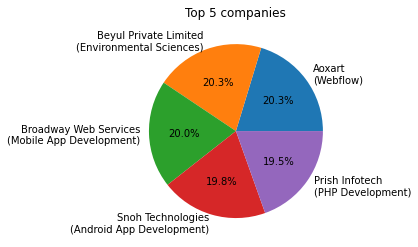

In [44]:
import matplotlib.pyplot as plt

names = ans['Company Name']+'\n('+ans['Job Title']+')'
index = ans['match']

plt.pie(index, labels=names, autopct = '%1.1f%%')
plt.title('Top 5 companies')
plt.show()

In [86]:
data = pd.read_csv('company_info.csv')

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company Name     781 non-null    object
 1   Job Title        781 non-null    object
 2   About Company    781 non-null    object
 3   Location         781 non-null    object
 4   Skills Required  781 non-null    object
 5   Logo             781 non-null    object
 6   Tags             781 non-null    object
dtypes: object(7)
memory usage: 42.8+ KB


In [76]:
# data.duplicated().sum()

# #delete duplicates
# data.drop_duplicates(inplace=True)
# # data.to_csv('company_info.csv', index=False)

In [88]:
data.duplicated().sum()

0

In [79]:
# pickle.dump(df_new, open('df_new.pkl','wb'))

In [89]:
data.columns

Index(['Company Name', 'Job Title', 'About Company', 'Location',
       'Skills Required', 'Logo', 'Tags'],
      dtype='object')

In [90]:
data['Logo'].values[1]

'https://internshala.com/cached_uploads/logo%2F5e2034cb713da1579168971.png'

In [91]:
data.shape

(781, 7)